**1. Importing Necessary libraries and  Made a class of Kalman Filter**

In [9]:
import csv
import math
import pandas as pd
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import math

class KalmanFilter:

    cov = float('nan')
    x = float('nan')

    def __init__(self, R, Q):
        """
        Constructor
        :param R: Process Noise
        :param Q: Measurement Noise
        """
        self.A = 1
        self.B = 0
        self.C = 1

        self.R = R
        self.Q = Q

    def filter(self, measurement):
        """
        Filters a measurement
        :param measurement: The measurement value to be filtered
        :return: The filtered value
        """
        u = 0
        if math.isnan(self.x):
            self.x = (1 / self.C) * measurement
            self.cov = (1 / self.C) * self.Q * (1 / self.C)
        else:
            predX = (self.A * self.x) + (self.B * u)
            predCov = ((self.A * self.cov) * self.A) + self.R

            # Kalman Gain
            K = predCov * self.C * (1 / ((self.C * predCov * self.C) + self.Q));

            # Correction
            self.x = predX + K * (measurement - (self.C * predX));
            self.cov = predCov - (K * self.C * predCov);

        return self.x

    def last_measurement(self):
        """
        Returns the last measurement fed into the filter
        :return: The last measurement fed into the filter
        """
        return self.x

    def set_measurement_noise(self, noise):
        """
        Sets measurement noise
        :param noise: The new measurement noise
        """
        self.Q = noise

    def set_process_noise(self, noise):
        """
        Sets process noise
        :param noise: The new process noise
        """
        self.R = noise


**2. Combining datasets and preprocessing**

The os.listdir() function is used to list all the files in the data_folder. The if file_name.endswith('.csv') condition ensures that only CSV files are processed. The os.path.join() function is used to construct the full file path to each CSV file, and the pd.read_csv() function is used to read the CSV file into a DataFrame

In [10]:
import os

# actual_dist=1 #varies with 1m to 25 m

# # Set the path to the folder containing the dataset
# data_folder = 'C:/Users/LILA/RTT-RSS with Kalman/raw_dataset'

# # Loop through each CSV file in the folder and read it into a DataFrame
# for file_name in os.listdir(data_folder):
#     if file_name.endswith(str(actual_dist)+'m.csv'):
#         file_path = os.path.join(data_folder, file_name)
#         df = pd.read_csv(file_path)
# df.drop(['#<Time(ms)>','<Ch-MHz>','<Burst#>','<AP-SSID>','<RTT AP?>','<Successes#>'],axis=1,inplace=True)
# df.rename(columns={'<True Range(m)>': 'True_Range', '<Est. Range(m)>': 'Est_Range','<RSSI(dBm)>': 'RSSI','<Std dev(m)>': 'stdev','<Successes#>': 'successes'}, inplace=True)
# Est=df.Est_Range
# R_RTT=Est.var()
# data1_RTT=Est.to_list()

In [13]:
import os
actual_dist= 21#varies with 1m to 25 m

# Set the path to the folder containing the dataset
# data_folder = 'C:\Users\LILA\Desktop\RTT-RSS with Kalman_offset\raw_dataset'
data_folder = r'C:\Users\LILA\Desktop\RTT-RSS with Kalman_offset\raw_dataset'
#data_folder = 'C:/Users/LILA/RTT-RSS with Kalman/raw_dataset'
# Loop through each CSV file in the folder and read it into a DataFrame
for file_name in os.listdir(data_folder):
     if file_name == (str(actual_dist)+'m.csv'): #if it found filname after defining file path break
        file_path = os.path.join(data_folder, file_name)
        df = pd.read_csv(file_path)
        break
df.drop(['#<Time(ms)>','<Ch-MHz>','<Burst#>','<AP-SSID>','<RTT AP?>','<Successes#>'],axis=1,inplace=True)
df.rename(columns={'<True Range(m)>': 'True_Range', '<Est. Range(m)>': 'Est_Range','<RSSI(dBm)>': 'RSSI','<Std dev(m)>': 'stdev','<Successes#>': 'successes'}, inplace=True)
Est=df.Est_Range
R_RTT=Est.var()
data1_RTT=Est.to_list()
df


,True_Range,Est_Range,stdev,RSSI
0,21,21.057,0.444,-76
1,21,21.233,0.551,-74
2,21,21.291,0.875,-74
3,21,20.940,0.673,-72
4,21,21.291,0.460,-73
...,...,...,...,...
294,21,21.087,0.444,-78
295,21,21.028,0.576,-77
296,21,22.053,0.061,-79
297,21,20.969,0.576,-79


In [1189]:
import numpy as np
import pandas as pd

def remove_outliers(df, col_name, threshold=3):
    """
    Remove outliers from a Pandas DataFrame using the Z-score method.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame to remove outliers from.
        col_name (str): The column name to remove outliers from.
        threshold (float): The Z-score threshold for outlier detection. Default is 3.
        
    Returns:
        A new DataFrame with outliers removed.
    """
    # Calculate the Z-score for each value in the column
    z_scores = np.abs((df[col_name] - df[col_name].mean()) / df[col_name].std())
    
    # Create a boolean mask where values with a Z-score greater than the threshold are set to False
    mask = z_scores <= threshold
    
    # Return a new DataFrame with the outliers removed
    return df[mask]

# Load the original DataFrame with column name 'Est_Range'
col_name = 'Est_Range'

# Remove outliers from the 'Est_Range' column
df = remove_outliers(df, col_name, threshold=3)
df
# # Save the new DataFrame to a CSV file
#df.to_csv('new_data_file.csv', index=False)


,True_Range,Est_Range,stdev,RSSI
0,21,21.057,0.444,-76
1,21,21.233,0.551,-74
2,21,21.291,0.875,-74
3,21,20.940,0.673,-72
4,21,21.291,0.460,-73
...,...,...,...,...
292,21,21.087,0.444,-78
293,21,21.028,0.576,-77
294,21,22.053,0.061,-79
295,21,20.969,0.576,-79


**3. Callibrating offset value of RTT Distance**


In [1190]:
# RTT_offset= np.average(df.Est_Range-actual_dist)
# print("Range Offset for "+str(actual_dist)+"m is:",RTT_offset)

In [1191]:
RTT_offset= np.average(df.stdev)
print("Range Offset for "+str(actual_dist)+"m is:",RTT_offset)

Range Offset for 21m is: 0.5003851351351352


**4. Updated dataset with offset values**

In [1192]:
# df['Final_range']=df['Est_Range']-RTT_offset
pd.options.mode.chained_assignment = None #to avoid warning
df.loc[:, 'Final_range'] = df['Est_Range'] - RTT_offset #To avoid this warning, we can use .loc or .iloc to explicitly modify the original DataFrame
df['Raw_error']=df['True_Range']-df['Est_Range']
df['Callibrated_data_error']=df['True_Range']-df['Final_range']
df

,True_Range,Est_Range,stdev,RSSI,Final_range,Raw_error,Callibrated_data_error
0,21,21.057,0.444,-76,20.556615,-0.057,0.443385
1,21,21.233,0.551,-74,20.732615,-0.233,0.267385
2,21,21.291,0.875,-74,20.790615,-0.291,0.209385
3,21,20.940,0.673,-72,20.439615,0.060,0.560385
4,21,21.291,0.460,-73,20.790615,-0.291,0.209385
...,...,...,...,...,...,...,...
292,21,21.087,0.444,-78,20.586615,-0.087,0.413385
293,21,21.028,0.576,-77,20.527615,-0.028,0.472385
294,21,22.053,0.061,-79,21.552615,-1.053,-0.552615
295,21,20.969,0.576,-79,20.468615,0.031,0.531385


In [1193]:
# # Specify the file name and path where you want to save the file
file_path = 'Offset_'+str(actual_dist)+'m.csv'


# Save the DataFrame to a CSV file using the to_csv() method
df.to_csv(file_path, index=False)

print(f'File saved to {file_path}!')

File saved to Offset_21m.csv!


In [1194]:
raw_error= df.Raw_error
callibrated_error=df.Callibrated_data_error

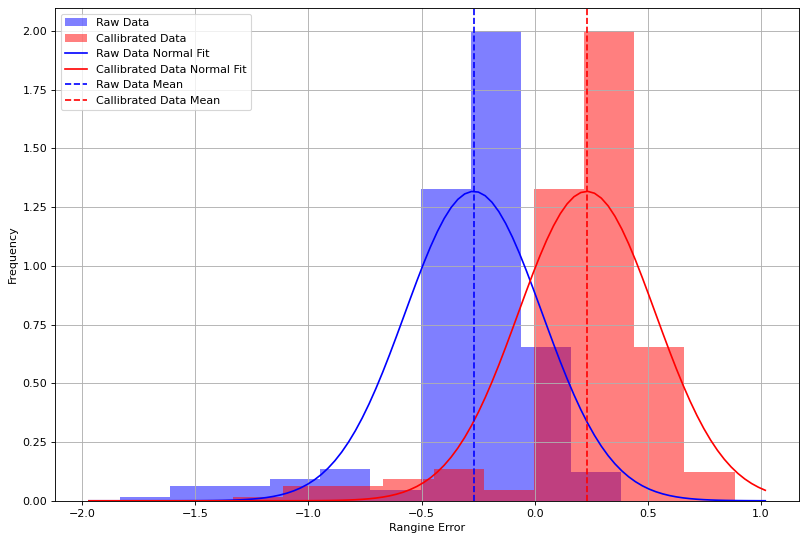

In [1195]:
from scipy.stats import norm
from matplotlib.pyplot import figure


figure(figsize=(12,8), dpi=80)
plt.hist(raw_error, bins=10, alpha=0.5, density=True, color='blue', label='Raw Data')
plt.hist(callibrated_error, bins=10, alpha=0.5, density=True, color='red', label='Callibrated Data')
plt.legend(loc='upper right')
plt.xlabel('Rangine Error')
plt.ylabel('Frequency')


xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) #for gaussian plot
plt.plot(x, norm.pdf(x, np.mean(raw_error), np.std(raw_error)), 'b-', label='Raw Data Normal Fit')
plt.plot(x, norm.pdf(x, np.mean(callibrated_error), np.std(callibrated_error)), 'r-', label='Callibrated Data Normal Fit')
plt.legend(loc='upper right')

plt.axvline(np.mean(raw_error), color='blue', linestyle='--', label='Raw Data Mean')
plt.axvline(np.mean(callibrated_error), color='red', linestyle='--', label='Callibrated Data Mean')


plt.legend()
plt.grid()
plt.show()


In [1196]:
Est=df.Final_range
R_RTT=Est.var()
data1_RTT=Est.to_list()
R_RTT

0.09209393164223532

In [1197]:
test = KalmanFilter(0.01,R_RTT)
testData =data1_RTT
data=[] # for storing all data
for x in testData:
    #data2= test.filter(x)
    #print ("Filtered Data:",data2)
    data.append(test.filter(x)) 
output=list(map(float,data))    #making it in the list
output_RTT=np.array(output)
#print(output)
#print(data)
output_RTT.shape

(296,)

In [1198]:
RSSI=df.RSSI
R_RSSI=RSSI.var()
data1_RSS=RSSI.to_list()
#data2=np.array(data1) #converting list to array
#data2

In [1199]:
test = KalmanFilter(0.01,R_RSSI)
testData =data1_RSS
data=[] # for storing all data
for x in testData:
    data2= test.filter(x)
    #print ("Filtered Data:",data2)
    data.append(test.filter(x)) 
output=list(map(float,data))    #making it in the list
output_RSS=np.array(output)
#print(output_RSS)
output_RSS.shape

(296,)

In [1200]:
# Define the column names for the DataFrame
columns = ['RTT', 'RSS']

# Create the DataFrame from the two separate lists
df_final = pd.DataFrame({'RTT': output_RTT, 'RSS': output_RSS})

# Specify the file name and path where you want to save the file
file_path = 'Kalman_'+str(actual_dist)+'m.csv'



#df_final = df_final.assign(TRUE=actual_dist)
df_final['TRUE']=actual_dist #for making standard format

# Save the DataFrame to a CSV file using the to_csv() method
df_final.to_csv(file_path, index=False)

print(f'File saved to {file_path}!')


File saved to Kalman_21m.csv!


In [1201]:
df_final

,RTT,RSS,TRUE
0,20.556615,-76.000000,21
1,20.649147,-74.994334,21
2,20.704055,-74.656660,21
3,20.616295,-73.966446,21
4,20.669598,-73.760262,21
...,...,...,...
291,20.712997,-77.532595,21
292,20.661151,-77.478691,21
293,20.910469,-77.632663,21
294,20.786894,-77.771052,21


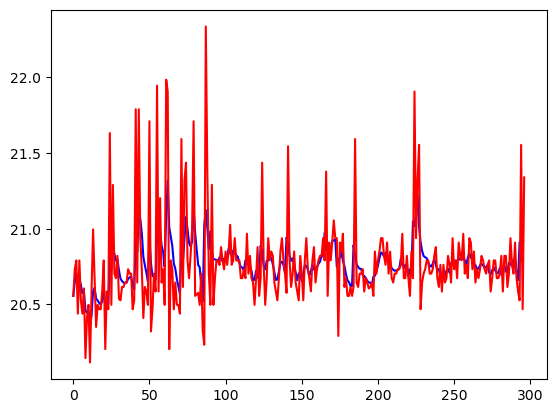

In [1202]:
plt.plot(df_final['RTT'], color='b')
plt.plot(df['Final_range'], color='r')

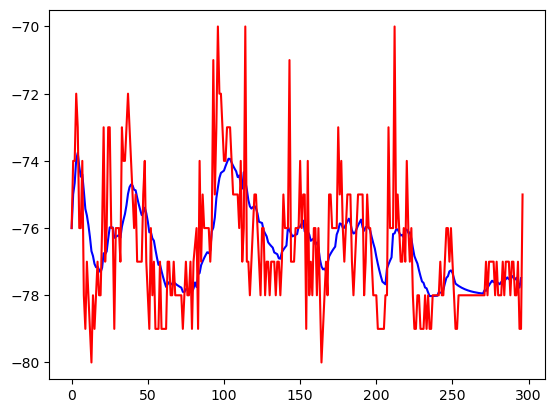

In [1203]:
plt.plot(df_final['RSS'], color='b')
plt.plot(df['RSSI'], color='r')

In [1204]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(df['True_Range'], df_final['RTT'])
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(df['True_Range'], df_final['RTT'])) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

Mean Squared Error in meter: 0.070
Root Mean Squared Error (RMSE) on new data in meter: 0.265


: 